In [73]:
# Import dependencies
import pandas as pd
import hvplot.pandas
import plotly.express as px
from path import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [53]:
file = Path('../Resources/feature_engineered_byPHUs_v2.csv')
covid_df = pd.read_csv(file)
covid_df.head()

,reporting_phu,reporting_phu_address,reporting_phu_city,reporting_phu_postal_code,reporting_phu_website,reporting_phu_latitude,reporting_phu_longitude,reporting_phu_id,2019,2020,...,21-mar,21-apr,21-may,21-jun,21-jul,21-aug,21-sep,21-oct,21-nov,21-dec
0,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893,2253,0,42670,...,10872,23756,11744,1485,583,2308,2219,1330,20,0
1,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815,2234,0,1013,...,271,675,279,45,31,94,108,121,6,0
2,Northwestern Health Unit,210 First Street North,Kenora,P9N 2K4,www.nwhu.on.ca,49.769615,-94.488254,2249,0,198,...,220,255,94,27,13,23,52,18,0,0
3,"Kingston, Frontenac and Lennox & Addington Pub...",221 Portsmouth Avenue,Kingston,K7M 1V5,www.kflaph.ca,44.227874,-76.525211,2241,0,562,...,226,364,227,23,25,44,128,177,18,0
4,Niagara Region Public Health Department,1815 Sir Isaac Brock Way,Thorold,L2V 4T7,www.niagararegion.ca/health,43.116537,-79.241220,2246,0,4770,...,1421,4201,1572,381,101,526,846,495,35,0


In [54]:
case_df = covid_df[['reporting_phu_id', 'jan', 'feb', 'mar', 'apr', 'may', 
'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
case_df.head()

,reporting_phu_id,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2253,13073,5986,11558,25910,13720,2577,1272,3055,4837,6621,13062,14367
1,2234,298,101,377,762,466,96,51,110,122,179,128,350
2,2249,70,227,230,262,100,45,16,25,72,31,50,69
3,2241,97,53,278,372,231,57,36,47,165,206,113,289
4,2246,3319,599,1623,4549,1730,442,217,587,1059,920,759,2462


In [55]:
caseDF = case_df
caseDF['Q1'] = caseDF[['dec', 'jan', 'feb']].sum(axis = 1)
caseDF['Q2'] = caseDF[['mar', 'apr', 'may']].sum(axis = 1)
caseDF['Q3'] = caseDF[['jun', 'jul', 'aug']].sum(axis = 1)
caseDF['Q4'] = caseDF[['sep', 'oct', 'nov']].sum(axis = 1)
caseDF.head()

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,reporting_phu_id,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,Q1,Q2,Q3,Q4
0,2253,13073,5986,11558,25910,13720,2577,1272,3055,4837,6621,13062,14367,33426,51188,6904,24520
1,2234,298,101,377,762,466,96,51,110,122,179,128,350,749,1605,257,429
2,2249,70,227,230,262,100,45,16,25,72,31,50,69,366,592,86,153
3,2241,97,53,278,372,231,57,36,47,165,206,113,289,439,881,140,484
4,2246,3319,599,1623,4549,1730,442,217,587,1059,920,759,2462,6380,7902,1246,2738


In [58]:
caseDF_revised = caseDF[['reporting_phu_id', 'Q1', 'Q2', 'Q3', 'Q4']]
# caseDF_revised.set_index('reporting_phu_id', inplace=True, drop=True)
ids = caseDF_revised['reporting_phu_id']
caseDF_revised.drop(columns = ['reporting_phu_id'], inplace = True)
print(caseDF_revised.shape)
caseDF_revised.head()

(34, 4)


C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Q1,Q2,Q3,Q4
0,33426,51188,6904,24520
1,749,1605,257,429
2,366,592,86,153
3,439,881,140,484
4,6380,7902,1246,2738


In [59]:
case_scaled = StandardScaler().fit_transform(caseDF_revised)
print(case_scaled)

[[ 2.70771863e+00  2.78595443e+00  2.58051932e+00  3.01109492e+00]
 [-4.33943950e-01 -3.84761700e-01 -5.22557222e-01 -4.28655411e-01]
 [-4.70766693e-01 -4.49540666e-01 -6.02386632e-01 -4.68063119e-01]
 [-4.63748259e-01 -4.31059796e-01 -5.77177344e-01 -4.20802426e-01]
 [ 1.07436899e-01  1.79166257e-02 -6.08537917e-02 -9.89728112e-02]
 [-4.88649278e-01 -4.73584981e-01 -5.24891415e-01 -4.67206430e-01]
 [-3.37224161e-01 -3.58671061e-01 -5.13220449e-01 -2.62029342e-01]
 [ 1.16443229e+00  1.14755179e+00  1.10064078e+00  1.07226425e+00]
 [-4.69709121e-01 -4.10916288e-01 -6.02853470e-01 -4.50929333e-01]
 [ 3.59908237e-01 -1.95156930e-01  9.42382478e-01  2.92450211e-02]
 [-4.72881838e-01 -4.42442477e-01 -2.09775323e-01 -4.33652766e-01]
 [-4.81246273e-01 -4.39692728e-01 -5.58970637e-01 -4.46217542e-01]
 [-4.38847240e-01 -4.08614172e-01 -5.07151546e-01 -4.49073173e-01]
 [-4.25771801e-01 -4.45895650e-01 -4.31990523e-01 -3.70543320e-01]
 [-4.92687282e-01 -4.73584981e-01 -6.18725985e-01 -4.68919809e

In [60]:
# PCA
pca = PCA(n_components=3, random_state=0)
pcs = pca.fit_transform(case_scaled)
pcs

array([[ 5.54388659e+00, -2.03206005e-01,  1.73356892e-01],
       [-8.84374183e-01, -1.02725070e-01, -1.11994024e-02],
       [-9.94583319e-01, -1.26444139e-01, -2.06957551e-02],
       [-9.45615961e-01, -1.28625966e-01,  6.63235122e-03],
       [-1.67624750e-02, -3.68642990e-02, -1.52671925e-01],
       [-9.76883322e-01, -4.96299001e-02,  5.57141441e-03],
       [-7.34445325e-01, -1.66416050e-01,  1.45588004e-02],
       [ 2.24256789e+00, -3.40968502e-03, -6.13419113e-02],
       [-9.66329855e-01, -1.49004705e-01, -1.01489951e-02],
       [ 5.63659445e-01,  8.38121855e-01, -1.19826271e-01],
       [-7.80742413e-01,  1.90162396e-01,  6.49168254e-02],
       [-9.62492171e-01, -1.00155280e-01,  7.87194175e-03],
       [-9.01422139e-01, -7.26393596e-02, -1.78087567e-02],
       [-8.36967477e-01, -1.89760695e-02,  2.96789103e-02],
       [-1.02615823e+00, -1.27695631e-01, -7.38244391e-03],
       [-8.23679954e-01, -1.17856885e-01, -7.20148657e-02],
       [-4.80404488e-01, -8.19092888e-03

In [61]:
pcs_df = pd.DataFrame(
    data = pcs,
    columns = ['PC1', 'PC2', 'PC3'],
    index = case_df.index
)
print(pcs_df.shape)
pcs_df.head()

(34, 3)


,PC1,PC2,PC3
0,5.543887,-0.203206,0.173357
1,-0.884374,-0.102725,-0.011199
2,-0.994583,-0.126444,-0.020696
3,-0.945616,-0.128626,0.006632
4,-0.016762,-0.036864,-0.152672


In [62]:
cVariance = pca.explained_variance_ratio_
print(f"Sum of Variances: {sum(cVariance)}, Length: {len(cVariance)}")

Sum of Variances: 0.9989460714473021, Length: 3


In [63]:
mergings = linkage(case_scaled, method = 'ward')

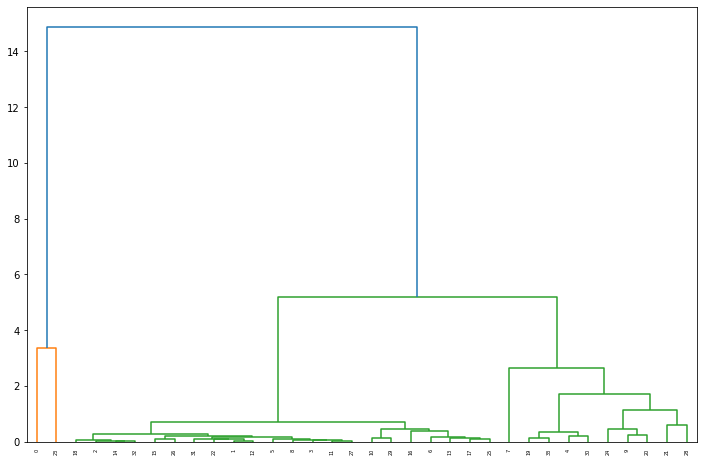

In [64]:
# Generate a dendrogram
plt.figure(figsize=(12,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

In [65]:
# Generate cluster labels with sklearn.cluster's AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(case_scaled)

In [71]:
clustered_df = pd.concat([caseDF_revised, pcs_df], axis=1)
clustered_df['Class'] = labels
clustered_df['reporting_phu_id'] = ids
clustered_df['reporting_phu'] = covid_df['reporting_phu']
clustered_df['reporting_phu_city'] = covid_df['reporting_phu_city']
clustered_df.set_index('reporting_phu_id', inplace=True, drop=True)
clustered_df

,Q1,Q2,Q3,Q4,PC1,PC2,PC3,Class,reporting_phu,reporting_phu_city
reporting_phu_id,,,,,,,,,,
2253,33426,51188,6904,24520,5.543887,-0.203206,0.173357,0,Peel Public Health,Mississauga
2234,749,1605,257,429,-0.884374,-0.102725,-0.011199,2,Haldimand-Norfolk Health Unit,Simcoe
2249,366,592,86,153,-0.994583,-0.126444,-0.020696,2,Northwestern Health Unit,Kenora
2241,439,881,140,484,-0.945616,-0.128626,0.006632,2,"Kingston, Frontenac and Lennox & Addington Pub...",Kingston
2246,6380,7902,1246,2738,-0.016762,-0.036864,-0.152672,1,Niagara Region Public Health Department,Thorold
2247,180,216,252,159,-0.976883,-0.049630,0.005571,2,North Bay Parry Sound District Health Unit,North Bay
2258,1755,2013,277,1596,-0.734445,-0.166416,0.014559,2,Eastern Ontario Health Unit,Cornwall
2270,17374,25567,3734,10941,2.242568,-0.003410,-0.061342,1,York Region Public Health Services,Newmarket
2243,377,1196,85,273,-0.966330,-0.149005,-0.010149,2,"Leeds, Grenville and Lanark District Health Unit",Brockville


In [74]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x = 'PC1',
    y = 'PC2',
    z = 'PC3',
    color = 'Class',
    symbol = 'Class',
    width = 800,
    hover_name = 'reporting_phu',
    hover_data = ['reporting_phu_city'],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [ ]:
# Plan:
# Turn PHU_ID into index
# PCA dataset
# Put PCA dataset into dataframe
# use dataframe for hierarchical clustering
# recombine dataset with city and name
# plot graph (hovering will show description)